<a href="https://colab.research.google.com/github/rajathAgalkote/BBCnews_TopicModeling_UnsupervisedML/blob/main/Rajathadri_TopicModeling_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - BBC News Topic Modeling



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajathadri A S

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

Importing all the neccessary libraries and packages that we require to develop the required model.

In [1]:
# Import Libraries

# importing os module
import os

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import re

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

Hence, the dataframe will contain the textual data along with its cateegory as two features.

In [3]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/AlmaBetter/Project_Unsupervised/'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

### Dataset First View

In [4]:
# Dataset First Look

bbc.head()

,Filename,Contents,Category
0,011,ask jeeves tips online ad revival ask jeeves ...,business
1,013,peugeot deal boosts mitsubishi struggling jap...,business
2,015,air passengers win new eu rights air passenge...,business
3,010,court rejects $280bn tobacco case a us govern...,business
4,005,pernod takeover talk lifts domecq shares in u...,business


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
bbc.shape

(2224, 3)

### Dataset Information

In [ ]:
# Dataset Info
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2224 non-null   object
 1   Contents  2224 non-null   object
 2   Category  2224 non-null   object
dtypes: object(3)
memory usage: 52.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
250,253,jobs growth still slow in the us the us creat...,business
281,240,economy 'strong' in election year uk business...,business
295,333,troubled marsh under sec scrutiny the us stoc...,business
345,356,s korea spending boost to economy south korea...,business
354,371,singapore growth at 8.1% in 2004 singapore's ...,business
...,...,...,...
2199,323,blind student 'hears in colour' a blind stude...,tech
2201,374,commodore finds new lease of life the once-fa...,tech
2212,387,progress on new internet domains by early 200...,tech
2216,382,tough rules for ringtone sellers firms that f...,tech


99 duplicate entries are present

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(bbc.isnull().sum())

Filename    0
Contents    0
Category    0
dtype: int64


<Axes: >

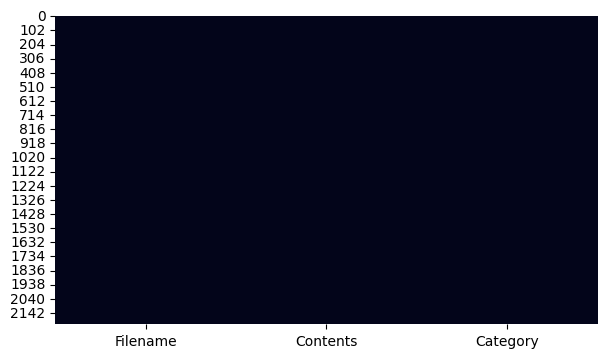

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(7,4))
sns.heatmap(bbc.isnull(), cbar=False)

No missing values are present in the 'bbc' dataset.

### What did you know about your dataset?

Our dataset in this case wasn't collective, it was stored in the form of numerous text files sub-categorized in 5 different domains.

We gathered all the textual data files into a dataframe called 'bbc' and performed some basic operations to understand our dataset.

There was a particular file in this dataset which was formatted differently from the rest of the files, hence while reading the data, the text formatting was throwing an exception. For such cases, we have neglected the file altogether using **try and except**, since the case was relevant to only a single file.



*   We observed that our BBC dataframe contains 2224 entries and 3 features.
*   All the features are object datatypes. Although, Filename and Category features should be numerical and categorical-numerical respectively.
* There are 99 duplicate rows. It informs us that these articles are present more than once, we need to drop such rows before we proceed further with the model development. 
* Finally, there are no missing values in our dataset.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bbc.columns

Index(['Filename', 'Contents', 'Category'], dtype='object')

In [ ]:
# Dataset Describe
bbc.describe().T

,count,unique,top,freq
Filename,2224,511,011,5
Contents,2224,2125,digital guru floats sub-$100 pc nicholas negr...,2
Category,2224,5,business,510


Since majority of our data is textual, describe() function is not of much value here due to the lack of numerical information to observe.

### Variables Description 

**The dataset consists of the following attributes:**

● **Index**: Entry index.

● **FileName**: Destination File name/number.

● **Contents**: Complete transcript of the articles, this contains all the textual data present in the destination file for a particular entry.

● **Category**: Theme/domain of the article.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in bbc.columns.tolist():
  print("Unique values in ",i,": ",bbc[i].nunique())

Unique values in  Filename :  511
Unique values in  Contents :  2125
Unique values in  Category :  5


This information was already imparted using the describe() function.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

We will begin data wrangling by dropping the 99 duplicate entries.

In [6]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')

In [7]:
bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category


In [8]:
bbc.shape

(2125, 3)

The Filename feature is an object datatype, but it contains numbers. Hence, we will coonvert it to int64 datatype using pandas to_numeric feature.

In [9]:
# Converting 'Filename' feature to numeric
bbc[['Filename']] = bbc[['Filename']].apply(pd.to_numeric)

In [10]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125 entries, 0 to 2223
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2125 non-null   int64 
 1   Contents  2125 non-null   object
 2   Category  2125 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.4+ KB


We will remove unwanted characters and punctuations from out 'Contents' feature.

In [11]:
lm = WordNetLemmatizer()

In [12]:
def rem_unwanted(article):
    modify = re.sub("[^a-zA-Z]",' ',article) #Keeping only alphabets in our corpus
    modify = modify.lower()                  #Coonverting into lower case
    return modify

In [13]:
bbc['Contents'] = bbc['Contents'].apply(rem_unwanted)

In [14]:
bbc['Contents']

0       ask jeeves tips online ad revival  ask jeeves ...
1       peugeot deal boosts mitsubishi  struggling jap...
2       air passengers win new eu rights  air passenge...
3       court rejects     bn tobacco case  a us govern...
4       pernod takeover talk lifts domecq  shares in u...
                              ...                        
2218    new consoles promise big problems  making game...
2219    us cyber security chief resigns  the man makin...
2221    sony psp tipped as a  must have   sony s plays...
2222    more movies head to sony s psp  movies open wa...
2223    local net tv takes off in austria  an austrian...
Name: Contents, Length: 2125, dtype: object

Now, we will resample the dataset and reset the indexes.

In [15]:
# Resampling the dataset

bbc_df = bbc.sample(bbc.shape[0])
bbc_df = bbc_df.reset_index(drop=True)

In [16]:
bbc_df.shape

(2125, 3)

In [17]:
bbc_df

,Filename,Contents,Category
0,126,ultimate game award for doom sci fi shoot...,tech
1,11,uk net users leading tv downloads british tv ...,tech
2,259,benitez deflects blame from dudek liverpool m...,sport
3,152,crude oil prices back above cold weather ...,business
4,159,mourinho defiant on chelsea form chelsea boss...,sport
...,...,...,...
2120,213,lib dems target the student vote students can...,politics
2121,68,gb select holmes for double bid kelly holmes ...,sport
2122,364,durex maker ssl awaits firm bid uk condom mak...,business
2123,205,yeading face newcastle in fa cup premiership ...,sport


Creating a new feature that associates category to id (categorical encoding).

In [21]:
bbc_df['Category'].value_counts()

sport            503
business         503
politics         403
entertainment    369
tech             347
Name: Category, dtype: int64

In [22]:
# Associate Category names with numerical index and save it in new column category_id
bbc_df['category_id'] = bbc_df['Category'].factorize()[0]

In [25]:
# Creating a Label Dataframe
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = bbc_df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

category_id_df

,Category,category_id
0,tech,0
2,sport,1
3,business,2
7,entertainment,3
8,politics,4


In [27]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

Let us create a new feature consisting of the length individual of articles.

In [23]:
bbc_df['News_length'] = bbc_df['Contents'].str.len()
bbc_df.head()

,Filename,Contents,Category,category_id,News_length
0,126,ultimate game award for doom sci fi shoot...,tech,0,1841
1,11,uk net users leading tv downloads british tv ...,tech,0,3375
2,259,benitez deflects blame from dudek liverpool m...,sport,1,1075
3,152,crude oil prices back above cold weather ...,business,2,1860
4,159,mourinho defiant on chelsea form chelsea boss...,sport,1,1380


### What all manipulations have you done and insights you found?

There were 99 duplicate entries in our BBC dataset. We first dropped the duplicate entries from the 'Contents' feature preserving the first occurances.

Next, we had observed that all the features were object datatypes. Hence, we converted the Filename feature to int64 dtype.

Then we defined a function that removes unwanted characters from our CONTENTS feature and then converts all textual data to lowercase, and then applied the defined function to all entries in out dataset.

Once the duplicate entries were dropped, we could observe that the index column was not properly distributed. Hence, we resampled the BBC dataset by resetting index and sampling it into a new dataframe called 'bbc_df'.

Finally, we created a new feature called 'News_length' that consists of length of all individual articles.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Understanding category distribution.

Now, lets see how many articles are there across all 5 categories.

In [28]:
# Grouping rows based on categories and counting the number of entries
df = bbc_df.groupby(['Category'])['Category'].count()
df

Category
business         503
entertainment    369
politics         403
sport            503
tech             347
Name: Category, dtype: int64

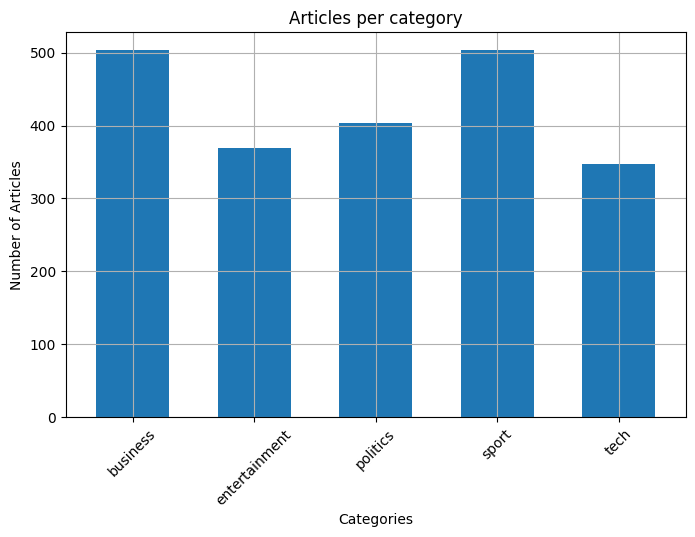

In [ ]:
# Chart - 1 visualization code

# Plotting a bar graph to represent all the categories and number of articles in each 
ax = df.plot(x = "Category", kind = "bar", 
        figsize=(8,5), grid = True,
        xlabel = "Categories",
        ylabel = "Number of Articles",
        width = 0.6, title = 'Articles per category',
        rot = 45)

plt.show()

##### 1. Why did you pick the specific chart?

We picked the bar chart to check the distribution of articles in percentage through individual categories.

##### 2. What is/are the insight(s) found from the chart?

There are more articles in 'Sports' and 'business' categories and less articles in 'tech' and ' entertainment', whereas 'politics' category has average number of articles.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we now know that BBC has more aricles in certain cateories whereas less number of articles in other categories.

#### Chart - 2

Observing the length of Articles.

We will plot a distribution plot to observe the frequency distribution of article lengths across our bbc_df dataframe.

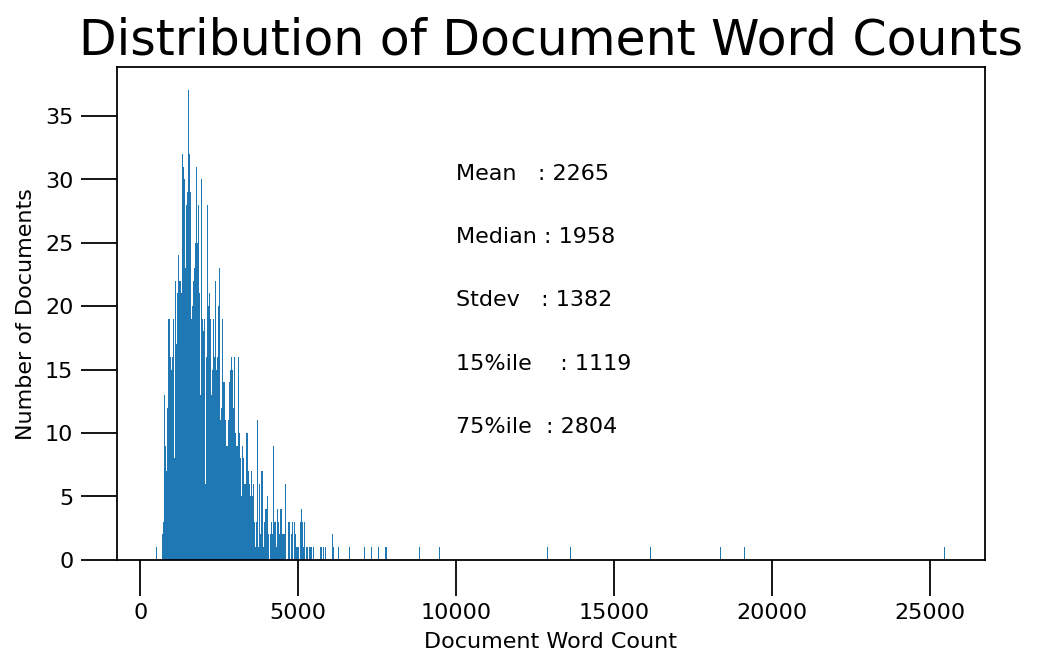

In [ ]:
# Chart - 2 visualization code

doc_lens = [d for d in bbc_df['News_length']]

# Plot
plt.figure(figsize=(7,4), dpi=160)
plt.hist(doc_lens, bins = 1000)
plt.text(10000, 30, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(10000, 25, "Median : " + str(round(np.median(doc_lens))))
plt.text(10000, 20, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(10000, 15, "15%ile    : " + str(round(np.quantile(doc_lens, q=0.1))))
plt.text(10000, 10, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

Most of the articles have lengths close to 1000-3000. However, some articles have word counts over 3000 as well. 

Let's check how many articles have such a higher lengths in our dataset.

In [ ]:
print("Number of articles having length less than 3000: {}".format((bbc_df['News_length'] < 3000).sum()))
print("Number of articles having length greater than 3000: {}".format((bbc_df['News_length'] > 3000).sum()))

Number of articles having length less than 3000: 1703
Number of articles having length greater than 3000: 421


##### 1. Why did you pick the specific chart?

We chose a distplot to observe the distribution of article lengths across our dataset. 

##### 2. What is/are the insight(s) found from the chart?

We found that most of the articles have lengths of around 300 to 3000 characters. We will use a kdeplot to further explore the distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, we now know that most of the articles have moderate lengths, and only a few articles have extremely low and high lengths.

#### Chart - 3

Distribution wrt categories

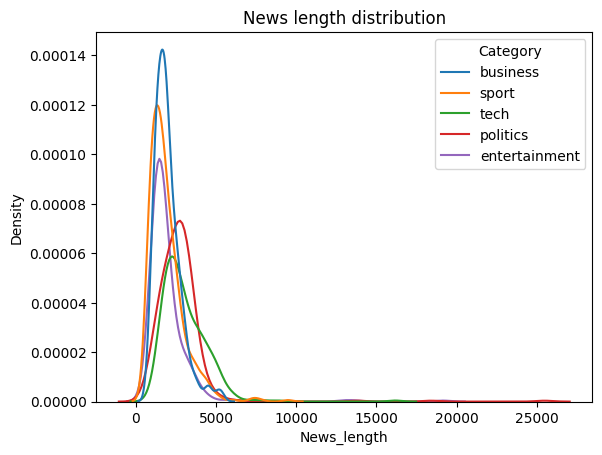

In [ ]:
# Chart - 3 visualization code
plt.figure()
sns.kdeplot(x= bbc_df['News_length'],data = bbc_df, hue = 'Category').set_title('News length distribution')
plt.show()

##### 1. Why did you pick the specific chart?

To observe the approximate length distributions of each categories.

##### 2. What is/are the insight(s) found from the chart?

The categories with highest lengths in descending order is as follows:
1. Sport
2. Business
3. Entertainment
4. Politics
5. Tech

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. We can observe that there is a distinct difference in the distribution of lengths of articles in different categories. Hence, this can be a strong  

#### Chart - 14 - Correlation Heatmap

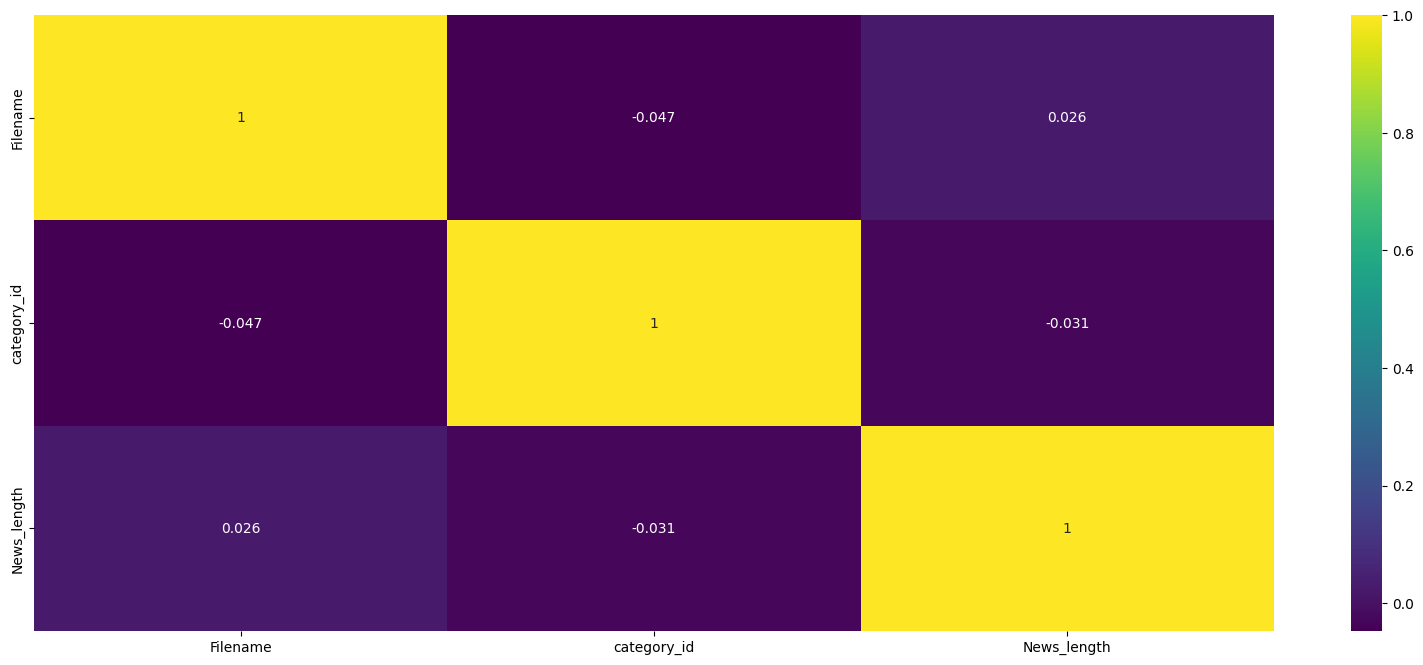

In [29]:
# Correlation Heatmap visualization code

# Checking for multi-collinearity
correlation = bbc_df.corr()

plt.figure(figsize=[20, 8])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [30]:
# Handling Missing Values & Missing Value Imputation

bbc_df.isnull().sum()

Filename       0
Contents       0
Category       0
category_id    0
News_length    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have used isnull() function to check if there are any missing values in the dataset.

As was verified during the initial data exploration and heatmap, there are no missing values in the dataset.

Hence, no operation is required to handle the missing values.

### 2. Handling Outliers

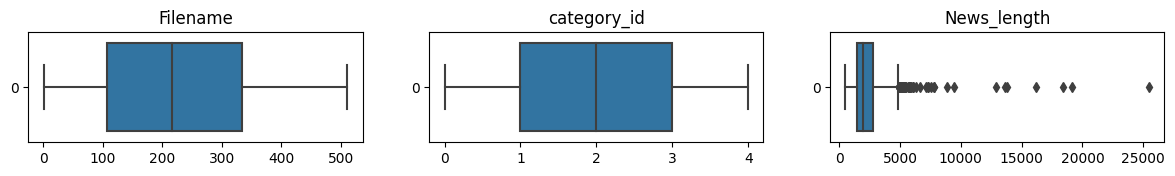

In [31]:
# Handling Outliers & Outlier treatments

# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in bbc_df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)
  
  # Create a box plot of the current column's data
  sns.boxplot(bbc_df[item], orient = 'h')
  
  # Add the column name to the subplot title
  plt.title(item)
  
  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

From the boxplot, we can observe that there are several outliers present in the 'News_length' feature. This informs us that the news length is majorly accumulated within 0 to 2000 characters, but there are also several news articles that have more than 2000 characters.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Although we can clearly see the occurances of outliers in our dataset, we will not remove these outliers due to the following reasons:

* We previously observed that there is evident distinction between the average values of 'News_length' feature for all categories. Hence, the varied distribution of news-length can provide as a strong determining factor for topic modeling.

* Outliers don't have much of an impact in topic modeling as the objective is to classify the articles into topics which doesn't involve much of news_length feature.

As we have observed, our dataset has got the complete set of articles. Now we can use this dataset to count the top words with highest frequencies using **CountVectorizer**.

### 3. Tokenization

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called Tokenization.

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called Feature Extraction (or Vectorization).

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

Now that we know what CountVectorizer is, it's time we implement it to gather the top-most occuring words in out dataset.

In [32]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

We will use this function later after removing stop words.

### 4. Removing Stop Words

**Stop Words:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Since these words occur a lot, a search engine has to be programmed to ignore them. We can easily remove them by storing a list of words that we consider to be stop words.

To remove the stop words, we will be using a library in python called NLTK.

**NLTK(Natural Language Toolkit)** in python has a list of stopwords stored in 16 different languages. Hence we'll use it to extract our data without all such words.

In [33]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

We know that all of our articles are in english language, hence we'll only require stopwords in english.

In [34]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### 5. Implementing Count Vectorizer

Now lets implement our countvectorizer to extract top words with highest frequencies.

In [35]:
bbc_df.head()

,Filename,Contents,Category,category_id,News_length
0,126,ultimate game award for doom sci fi shoot...,tech,0,1841
1,11,uk net users leading tv downloads british tv ...,tech,0,3375
2,259,benitez deflects blame from dudek liverpool m...,sport,1,1075
3,152,crude oil prices back above cold weather ...,business,2,1860
4,159,mourinho defiant on chelsea form chelsea boss...,sport,1,1380


In [36]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [37]:
counts = count_vectorizer.fit_transform(bbc_df['Contents'])

In [38]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [39]:
# Shape of our sparse dataset
counts_df.shape

(2125, 27736)

In [40]:
counts_df.head()

,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,aara,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let us count the number of occurances of all the terms/words used in all the articles.

We will follow the following steps to describe our most used words:

1. Create an empty dictionary
2. Storing the words as keys and the count as values
3. Updating our stopwords
4. Plotting the most frequent words using a bar-plot

In [41]:
# Creating an empty dictionary
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [42]:
# Looking at the most common words
# Sorting the occurance of each term in a descending order

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:20]

[('said', 6927),
 ('mr', 2859),
 ('would', 2472),
 ('year', 2223),
 ('also', 2035),
 ('people', 1895),
 ('us', 1884),
 ('new', 1877),
 ('one', 1810),
 ('could', 1441),
 ('last', 1331),
 ('first', 1294),
 ('time', 1280),
 ('two', 1234),
 ('world', 1160),
 ('government', 1135),
 ('uk', 1058),
 ('years', 968),
 ('bn', 944),
 ('best', 932)]

Text(0, 0.5, 'Terms')

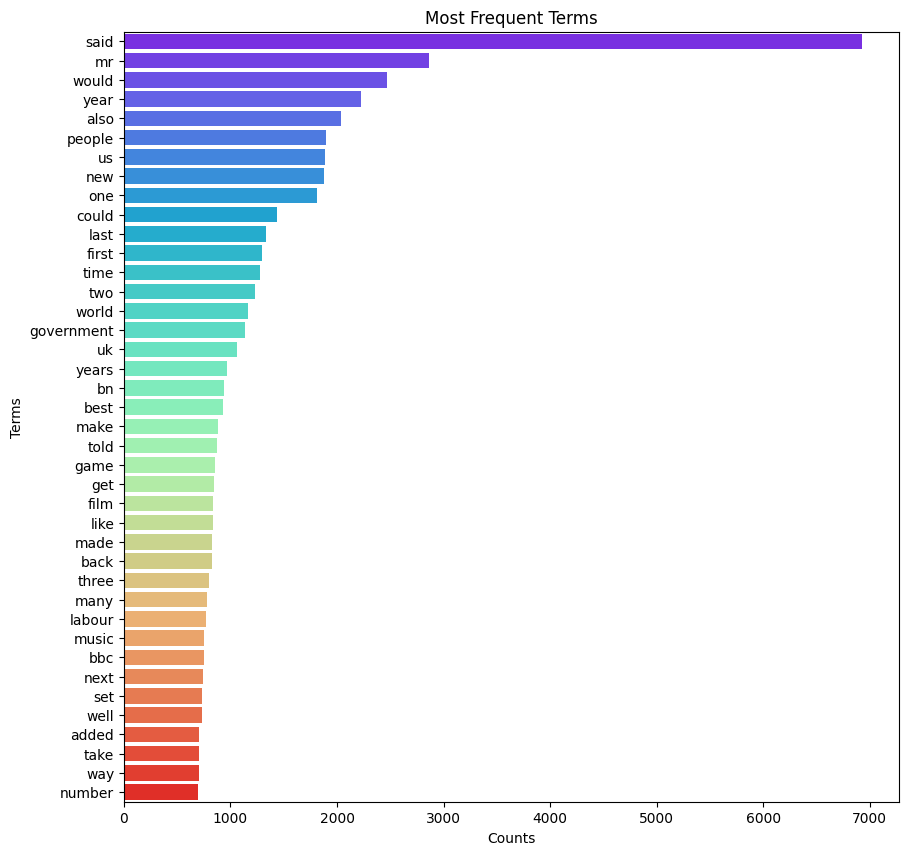

In [79]:
# Plotting a bar plot for the most frequent terms
top_words = [word for word, count in sorted_counts[:40]]
count_top_words = [count for word, count in sorted_counts[:40]]

plt.figure(figsize = (10,10))
sns.barplot(y = top_words, x=count_top_words, palette = 'rainbow')
plt.title("Most Frequent Terms")
plt.xlabel("Counts")
plt.ylabel("Terms")

We can see some commonly used words like "said", "mr", "would" etc, are on top, which makes sense because no matter what the subject of a article is, these words help build up a sentence and hence the excessive use is inevitable.

However, we can also find a few words relevant to the categories of our articles. For example, 'UK' and 'US'(since we converted all words to lower case, 'us' represents US too) both are country names which could reflect to any of the categories. Also words like 'government' could reflect in articles related to Politics, Business, Tech etc.

The words like 'film' and 'game' sounds relevant to the entertainment category.

In [90]:
# Removing the most frequently used words (above 1500 repetitions)

add_stopwords = ['said', 'mr', 'would' ,'year', 'also', 'people','us','new','one']

In [91]:
#Function to remove additional stopwords 
def remove_add_stopwords(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in add_stopwords]
  return " ".join(text)

In [92]:
#Removing addtional stopwords according to use case
bbc_df['Contents'] = bbc_df['Contents'].apply(remove_add_stopwords)

### 6. Stemming & Lemmatization Test

**Stemming** is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization**: This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or **lemma**. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [93]:
# Contents/Articles in our dataset
bbc_df['Contents']

0       ultimate game award for doom sci fi shooter do...
1       uk net users leading tv downloads british tv v...
2       benitez deflects blame from dudek liverpool ma...
3       crude oil prices back above cold weather acros...
4       mourinho defiant on chelsea form chelsea boss ...
                              ...                        
2120    lib dems target the student vote students can ...
2121    gb select holmes for double bid kelly holmes h...
2122    durex maker ssl awaits firm bid uk condom make...
2123    yeading face newcastle in fa cup premiership s...
2124    deutsche boerse set to woo lse bosses of deuts...
Name: Contents, Length: 2125, dtype: object

For the process of lemmatization, we will use WordNetLemmatizer.

First, Let us implement the lemmatizer on one of the articles to check it's operation.

In [45]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [94]:
lemmatizer = WordNetLemmatizer()

In [95]:
# Lemmatizing an article to see what wordnet returns
for rows in bbc_df['Contents']:
 print(rows)
 print(len(rows))
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

ultimate game award for doom sci fi shooter doom has blasted away the competition at a major games ceremony the golden joystick awards it was the only title to win twice winning ultimate game of the and best pc game at the awards presented by little britain star matt lucas the much anticipated sci fi horror doom shot straight to the top of the uk games charts on its release in august other winners included grand theft auto san andreas which took the most wanted for christmas prize only released last week it was closely followed by halo and half life which are expected to be big hits when they are unleashed later this month but they missed out on the prize for the most wanted game of which went to the nintendo title the legend of zelda the original doom released in heralded a era in computer games and introduced d graphics it helped to establish the concept of the first person shooter doom was developed over four years and is thought to have cost around m m the top honour for the best o

As we can see the lemmatizer seems to be working fine, the words are segregated into a list. 

##### Now, lets try the lemmatization using Snowball Lemmatizer.

In [96]:
# Snowball lemmatizer object
sno = nltk.stem.SnowballStemmer('english')

In [97]:
# Lemmatizing an article to see what snowball lemmatizer returns
for rows in bbc_df['Contents']:
 print(rows)
 print(len(rows))
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

ultimate game award for doom sci fi shooter doom has blasted away the competition at a major games ceremony the golden joystick awards it was the only title to win twice winning ultimate game of the and best pc game at the awards presented by little britain star matt lucas the much anticipated sci fi horror doom shot straight to the top of the uk games charts on its release in august other winners included grand theft auto san andreas which took the most wanted for christmas prize only released last week it was closely followed by halo and half life which are expected to be big hits when they are unleashed later this month but they missed out on the prize for the most wanted game of which went to the nintendo title the legend of zelda the original doom released in heralded a era in computer games and introduced d graphics it helped to establish the concept of the first person shooter doom was developed over four years and is thought to have cost around m m the top honour for the best o

Again the lemmatizer does its job and we got the list of words similar to WordNet Lemmatizer.

##### Now, let's check the same with textBlob

In [98]:
# Lemmatizing using textblob
for rows in bbc_df['Contents']:
 print(rows)
 print(len(rows))
 test = [Word(words).lemmatize() for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

ultimate game award for doom sci fi shooter doom has blasted away the competition at a major games ceremony the golden joystick awards it was the only title to win twice winning ultimate game of the and best pc game at the awards presented by little britain star matt lucas the much anticipated sci fi horror doom shot straight to the top of the uk games charts on its release in august other winners included grand theft auto san andreas which took the most wanted for christmas prize only released last week it was closely followed by halo and half life which are expected to be big hits when they are unleashed later this month but they missed out on the prize for the most wanted game of which went to the nintendo title the legend of zelda the original doom released in heralded a era in computer games and introduced d graphics it helped to establish the concept of the first person shooter doom was developed over four years and is thought to have cost around m m the top honour for the best o

We can clearly observe that similar lemmatized output is obtained from textBlob as well.


##### All of the following lemmatizers are displaying same results:

1. WordNetLemmatizer
2. Snowball Lemmatizer
3. textBlob

And all of the above lemmatizer algorithms are performing well on our content feature.

### 7. Feature Extraction (Vectorization)

Vectorization is a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

Let us implement vectorization.

In [99]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [100]:
# Taking a sample Article
text_sample = bbc_df.Contents

In [101]:
print('Content before vectorization:\n {}'.format(text_sample[123]))

Content before vectorization:
 mexican in send bn home mexican labourers living in the sent a record bn bn home last the bank of mexico that remittances grew last and now represent the country s second biggest source of income after oil better records and greater prosperity of mexican expatriates in the are the main reasons behind the increase about million mexicans live in the where there are million citizens of mexican origin remittances now represent more than of the country s gdp according to the bank of mexico s figures last there were million transactions with an average value of per remittance the bank according to standard poor s which has recently upgraded mexico s sovereign debt rating the rise in remittances helps protect the mexican economy against a potential fall in the international oil prices the growth in remittances has sparked fierce competition between banks bank of america announced last week that it planned to eliminate transfer fees for some customers remittance 

In [102]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 3745)	2
  (0, 1495)	6
  (0, 284)	1
  (0, 1362)	2
  (0, 289)	1
  (0, 725)	1
  (0, 2148)	1
  (0, 1497)	6
  (0, 572)	1
  (0, 1556)	1
  (0, 286)	4
  (0, 3650)	2
  (0, 3928)	1
  (0, 3733)	1
  (0, 3936)	1
  (0, 367)	2
  (0, 2568)	1
  (0, 2705)	1
  (0, 2094)	1
  (0, 459)	1
  (0, 3402)	1
  (0, 2200)	1
  (0, 2334)	1
  (0, 168)	1
  (0, 1701)	1
  :	:
  (2124, 139)	1
  (2124, 3175)	1
  (2124, 3760)	1
  (2124, 3563)	3
  (2124, 1839)	1
  (2124, 193)	1
  (2124, 2431)	1
  (2124, 395)	1
  (2124, 2776)	1
  (2124, 1841)	1
  (2124, 692)	1
  (2124, 2468)	1
  (2124, 2087)	1
  (2124, 993)	7
  (2124, 373)	1
  (2124, 2931)	1
  (2124, 1253)	2
  (2124, 3258)	1
  (2124, 342)	1
  (2124, 1895)	1
  (2124, 1460)	1
  (2124, 2577)	1
  (2124, 414)	7
  (2124, 1227)	5
  (2124, 2129)	10


We can see that the text was succesfully converted into a vectorized numeric form. The countvectorizer works as intended, we can now proceed forward to implement the ML model.

## ***7. ML Model Implementation***

### ML Model - 1

LDA

Now that all the necessary preprocessing is done, we'll implement the ML model for topic modeling on the BBC news articles. Here we have used the LDA algorithm for this purpose. Let’s discuss more about the algorithm and its specifics.

##### **Latent Dirichlet Allocation (LDA)** 

It is one of most popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed. The Dirichlet model describes the pattern of the words that are repeating together, occurring frequently, and these words are similar to each other.

And this stochastic process uses Bayesian inferences for explaining “the prior knowledge about the distribution of random variables”. In the case of topic modeling, the process helps in estimating what are the chances of the words, which are spread over the document, will occur again? This enables the model to build data points, estimate probabilities, that’s why LDA is a breed of generative probabilistic model.

LDA generates probabilities for the words using which the topics are formed and eventually the topics are classified into documents.

The LDA makes two key assumptions:

* Documents are a mixture of topics, and
* Topics are a mixture of tokens (or words)

The end goal of LDA is to find the most optimal representation of the Document-Topic matrix and the Topic-Word matrix to find the most optimized Document-Topic distribution and Topic-Word distribution.

As LDA assumes that documents are a mixture of topics, where topics are a mixture of words so LDA backtracks from the document level to identify which topics would have generated these documents and which words would have generated those topics.

In [ ]:
# ML Model - 1 Implementation

In [103]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(document_term_matrix);

In [104]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['china', 'bank', 'firm', 'last', 'company', 'economy', 'sales', 'growth', 'market', 'bn']


Topic #1:
['brown', 'public', 'told', 'minister', 'could', 'blair', 'party', 'election', 'labour', 'government']


Topic #2:
['online', 'like', 'net', 'phone', 'users', 'use', 'could', 'mobile', 'games', 'technology']


Topic #3:
['uk', 'star', 'years', 'first', 'award', 'awards', 'show', 'music', 'best', 'film']


Topic #4:
['club', 'last', 'world', 'back', 'two', 'win', 'time', 'england', 'first', 'game']




Looks like the topics could be:

Econoomy,Politics,Technology, Entertainment, Sports.

In [105]:
topic_values = lda.transform(document_term_matrix)
doc_num, topic_num = topic_values.shape

In [106]:
topic_values.shape

(2125, 5)

Let us explore this in a pandas dataframe so that we can better understand.

In [108]:
df = pd.DataFrame({'document': bbc_df['Contents'], 'label': bbc_df['Category'], 'lda': topic_values.argmax(axis=1)})
df.groupby(['label', 'lda']).count().unstack()

document                            
lda                  0      1      2      3      4
label                                             
business         367.0  125.0    9.0    2.0    NaN
entertainment      4.0   22.0    4.0  339.0    NaN
politics           2.0  397.0    1.0    2.0    1.0
sport              NaN    3.0   24.0    2.0  474.0
tech               8.0   14.0  317.0    5.0    3.0

Comparing "lda" results to "labels" that were taken from the data set, we can see that most of the articles topics have accurate word distribution, whereas only "BUSINESS" category has a distributed segregation. This may be because several words are present in multiple topics. 

Let's look at the matrix of probabilities for each document to better understand retrieved results.

In order to visualize, we will use bokeh library.

In [111]:
# Importing necessary BOKEH modules
from bokeh.models import LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.plotting import figure
from bokeh.sampledata.unemployment1948 import data
from bokeh.io import output_notebook
from math import pi
from bokeh.io import show, output_file

In [112]:
# creating matrix of topic distribution
prob_matrix_df = pd.DataFrame(data=topic_values[0:,0:], 
              index=list(range(len(topic_values))),
              columns=list(range(topic_num)))
prob_matrix_df

,0,1,2,3,4
0,0.001451,0.001418,0.332887,0.662804,0.001439
1,0.000797,0.000789,0.930777,0.066852,0.000786
2,0.002729,0.002734,0.002736,0.002726,0.989075
3,0.994566,0.001360,0.001350,0.001361,0.001363
4,0.001723,0.001735,0.001731,0.001743,0.993067
...,...,...,...,...,...
2120,0.000735,0.922869,0.000735,0.000730,0.074931
2121,0.000876,0.000880,0.000872,0.073095,0.924278
2122,0.618369,0.329160,0.002374,0.002415,0.047681
2123,0.001257,0.001260,0.001253,0.001263,0.994968


In [113]:
# Creating topic weightage distribution for each document
prob_matrix_df['doc'] = list(range(doc_num))
prob_matrix_df = prob_matrix_df.set_index('doc')
prob_matrix_df.columns.name = 'topic'
df = pd.DataFrame(prob_matrix_df.stack(), columns=['rate']).reset_index()

In [114]:
df.head()

,doc,topic,rate
0,0,0,0.001451
1,0,1,0.001418
2,0,2,0.332887
3,0,3,0.662804
4,0,4,0.001439


In [115]:
# taking random documents for example
import random
rand = random.sample(range(1, 2555), 100)
df_rand = df.loc[df['doc'].isin(rand)]

In [116]:
category_to_id

{'tech': 0, 'sport': 1, 'business': 2, 'entertainment': 3, 'politics': 4}

In [117]:
# Changing dtypes of our dataframe
df['doc'] = df['doc'].astype(str)
df['topic'] = df['topic'].astype(str)
df['rate'] = df['rate']*100

# Creating a list of all document indexes
docs = list(set(df['doc'].head(50)))
docs.sort()
docs = [str(i) for i in docs]
# Topics list
topics = ['0','1','2','3','4']

In [118]:
# Plotting for topic distribution
colors = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fbff']
colors.reverse()

mapper = LinearColorMapper(palette=colors, low=df.rate.min(), high=df.rate.max())
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="Topic probability per document",
           x_range=topics, y_range=docs,
           x_axis_location="above", plot_width=800, plot_height=400,
                      tools=TOOLS, toolbar_location='below',
           tooltips=[('rate', '@rate%')]
          )

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0

p.rect(x="topic", y="doc", width=1, height=1,
       source=df,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

output_notebook()
show(p)

From the above density distribution, the plot shows the probability scores for each topic. It is now clear that some of the documents were almost equally classified in two categories so that the error is highly probable. Such cases should be always taken into account.

### WordCloud for LDA

In [123]:
# Defining a function to plot WordCloud
def word_cloud_lda(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

In [122]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names_out()

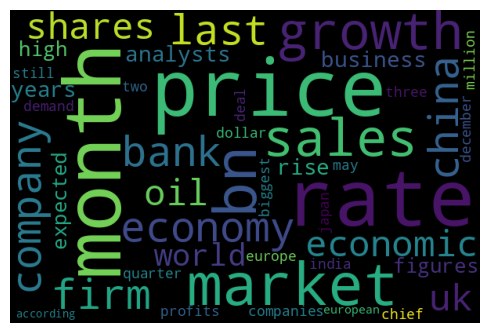

In [124]:
#Word Cloud for Business
word_cloud_lda(0)

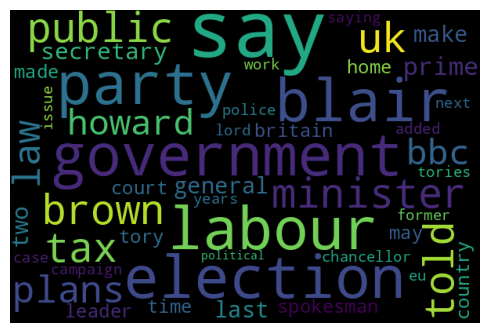

In [125]:
#Word Cloud for Politics
word_cloud_lda(1)

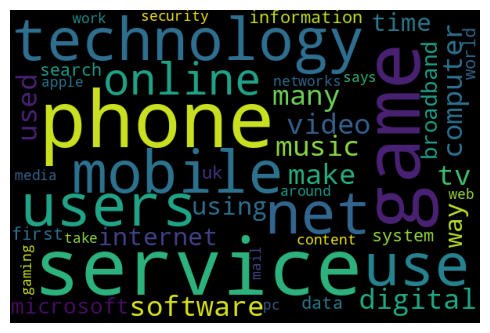

In [126]:
#Word Cloud for Tech
word_cloud_lda(2)

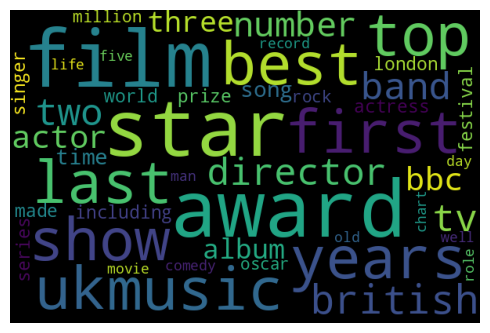

In [127]:
#Word Cloud for Entertainment
word_cloud_lda(3)

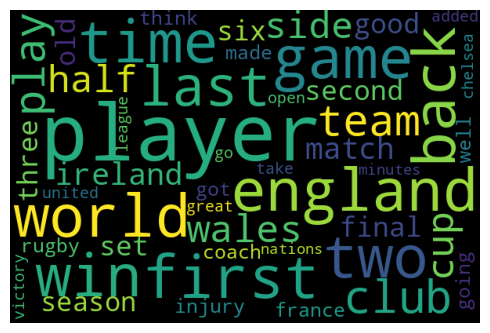

In [128]:
#Word Cloud for Sports
word_cloud_lda(4)

### ML Model - 2
LSA

Latent Semantic Analysis (LSA) is a technique used in natural language processing and machine learning for extracting and representing the underlying semantic structure of a set of documents. It applies singular value decomposition (SVD) to a term-document matrix to identify hidden relationships between words and documents.

LSA can be applied in topic modeling, which is the process of uncovering latent topics within a collection of documents. By using LSA, topic modeling algorithms can discover the underlying themes or topics in a corpus by analyzing the co-occurrence patterns of words across documents.

LSA-based topic modeling helps in organizing and understanding large text collections by revealing the hidden thematic structure. It has applications in information retrieval, document clustering, text classification, recommendation systems, and more.

In [129]:
# creating svd instance
svd_model = TruncatedSVD(n_components=5,random_state=42,algorithm='randomized')

# fit model to data
svd_model.fit(document_term_matrix)

tsvd_mat=svd_model.transform(document_term_matrix)

In [130]:
#Shape of truncated SVD
tsvd_mat.shape

(2125, 5)

Now, T-SNE can be employed as a separate step after LSA to visualize the reduced-dimensional representations obtained from LSA. Once LSA has been applied to reduce the dimensionality of the data, t-SNE can be used to further reduce the dimensionality to two or three dimensions, allowing for a visual representation of the data points in a scatter plot.

In [139]:
# Applying t-SNE to the LSA-transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed_data = tsne.fit_transform(tsvd_mat)

By applying t-SNE to the LSA-transformed data, one can gain insights into the clustering and distribution of documents or terms, visually identifying patterns or relationships that may be indicative of semantic similarities or groupings. This visualization can aid in the interpretation and exploration of the latent semantic structure uncovered by LSA.

In [142]:
category_id_df

,Category,category_id
0,tech,0
2,sport,1
3,business,2
7,entertainment,3
8,politics,4


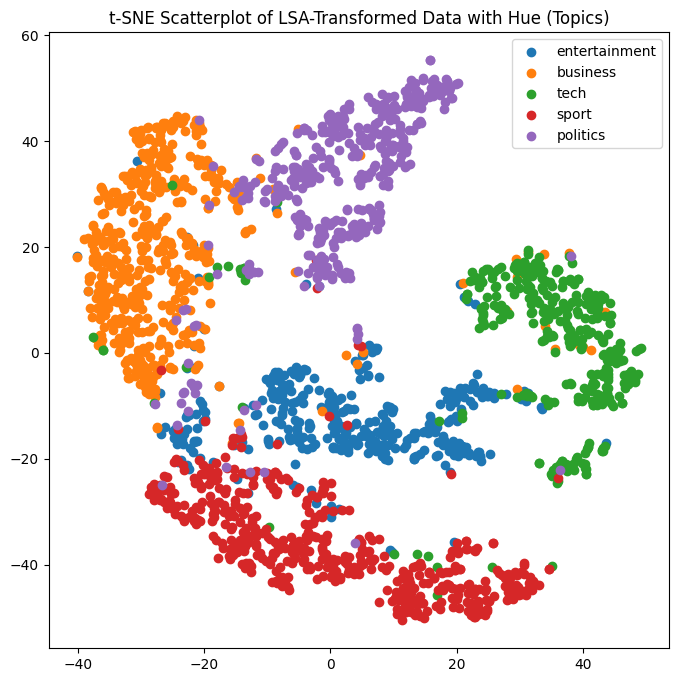

In [145]:
# Plotting the scatterplot

# Creating a color map for topics
unique_topics = list(set(category_id_df['Category']))
num_topics = len(unique_topics)
color_map = plt.get_cmap('tab10')

# Plotting the scatterplot with hue
plt.figure(figsize=(8, 8))
for i, topic in enumerate(unique_topics):
    topic_indices = [idx for idx, label in enumerate(bbc_df['Category']) if label == topic]
    plt.scatter(tsne_transformed_data[topic_indices, 0], tsne_transformed_data[topic_indices, 1], color=color_map(i), label=topic)

plt.title("t-SNE Scatterplot of LSA-Transformed Data with Hue (Topics)")
plt.legend()
plt.show()

### WordCloud for LSA

In [146]:
# Function to generate word cloud for each topic
def word_cloud_lsa(index):
  imp_words_topic=""
  comp=svd_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=800, height=500).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

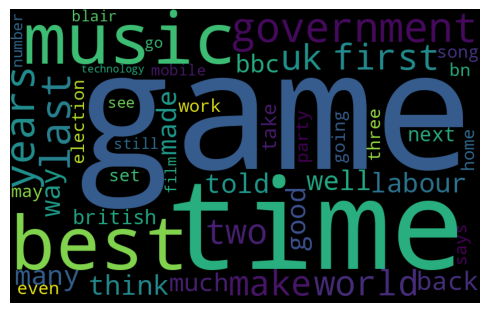

In [147]:
#Word Cloud for each topic using LSA
word_cloud_lsa(0)

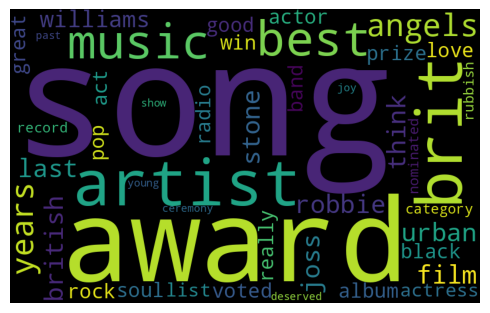

In [148]:
#Word Cloud for each topic using LSA
word_cloud_lsa(1)

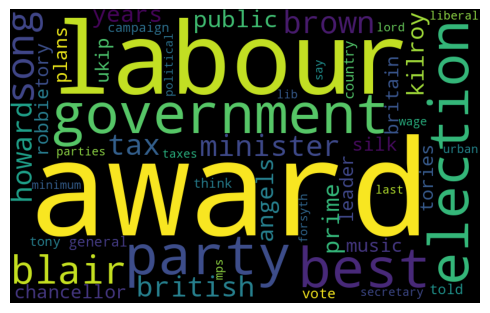

In [149]:
#Word Cloud for  each topic using LSA
word_cloud_lsa(2)

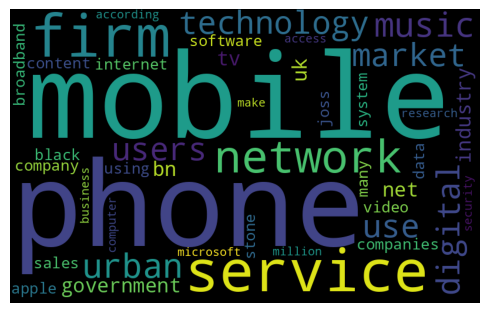

In [150]:
#Word Cloud for  each topic using LSA
word_cloud_lsa(3)

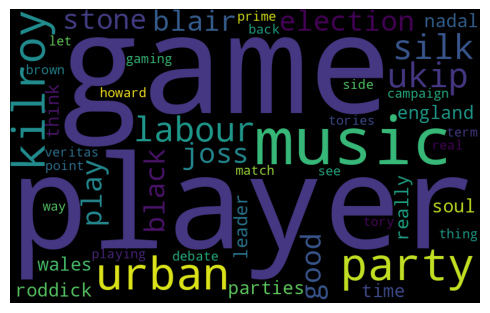

In [151]:
#Word Cloud for  each topic using LSA
word_cloud_lsa(4)

Topic modeling using LSA is not clearly segregated as there seems to be a mix of terms that belong to multiple topics. This was not a surprise since we already expected this to happen after we saw the overlapping of topics in the scatterplot.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***